### Dataset and Problem Definition

In [1]:
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [2]:
sns.get_dataset_names()

C:\Users\jungwoo\Anaconda3\envs\dacon15\lib\site-packages\seaborn\utils.py:384: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\Users\jungwoo\Anaconda3\envs\dacon15\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [3]:
flight_data = sns.load_dataset("flights")
flight_data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [4]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

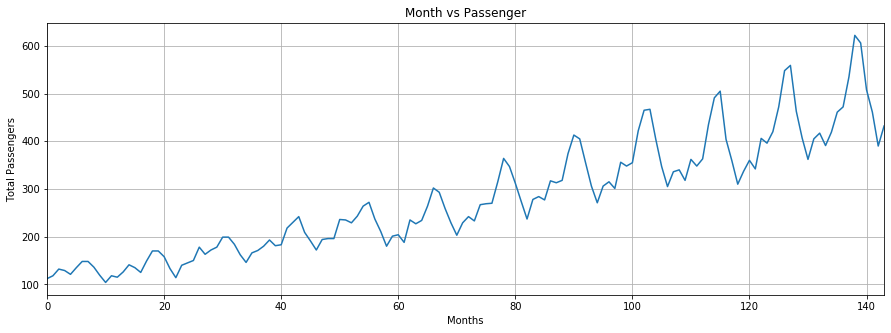

In [5]:
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.xlabel('Months')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(flight_data['passengers'])

### Data Preprocessing

In [6]:
flight_data.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [7]:
all_data = flight_data['passengers'].values.astype(float)

In [8]:
print(all_data)

[112. 118. 132. 129. 121. 135. 148. 148. 136. 119. 104. 118. 115. 126.
 141. 135. 125. 149. 170. 170. 158. 133. 114. 140. 145. 150. 178. 163.
 172. 178. 199. 199. 184. 162. 146. 166. 171. 180. 193. 181. 183. 218.
 230. 242. 209. 191. 172. 194. 196. 196. 236. 235. 229. 243. 264. 272.
 237. 211. 180. 201. 204. 188. 235. 227. 234. 264. 302. 293. 259. 229.
 203. 229. 242. 233. 267. 269. 270. 315. 364. 347. 312. 274. 237. 278.
 284. 277. 317. 313. 318. 374. 413. 405. 355. 306. 271. 306. 315. 301.
 356. 348. 355. 422. 465. 467. 404. 347. 305. 336. 340. 318. 362. 348.
 363. 435. 491. 505. 404. 359. 310. 337. 360. 342. 406. 396. 420. 472.
 548. 559. 463. 407. 362. 405. 417. 391. 419. 461. 472. 535. 622. 606.
 508. 461. 390. 432.]


In [9]:
test_data_size = 12

train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]

In [10]:
print(len(train_data))
print(len(test_data))
print(test_data)

132
12
[417. 391. 419. 461. 472. 535. 622. 606. 508. 461. 390. 432.]


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))

In [12]:
print(train_data_normalized[:5])
print(train_data_normalized[-5:])

[[-0.96483516]
 [-0.93846154]
 [-0.87692308]
 [-0.89010989]
 [-0.92527473]]
[[1.        ]
 [0.57802198]
 [0.33186813]
 [0.13406593]
 [0.32307692]]


In [13]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)
train_data_normalized = train_data_normalized.to(device)

In [14]:
train_window = 12

In [15]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [16]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)

In [17]:
train_inout_seq[:5]

[(tensor([-0.9648, -0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066,
          -0.8593, -0.9341, -1.0000, -0.9385], device='cuda:0'),
  tensor([-0.9516], device='cuda:0')),
 (tensor([-0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593,
          -0.9341, -1.0000, -0.9385, -0.9516], device='cuda:0'),
  tensor([-0.9033], device='cuda:0')),
 (tensor([-0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341,
          -1.0000, -0.9385, -0.9516, -0.9033], device='cuda:0'),
  tensor([-0.8374], device='cuda:0')),
 (tensor([-0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341, -1.0000,
          -0.9385, -0.9516, -0.9033, -0.8374], device='cuda:0'),
  tensor([-0.8637], device='cuda:0')),
 (tensor([-0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341, -1.0000, -0.9385,
          -0.9516, -0.9033, -0.8374, -0.8637], device='cuda:0'),
  tensor([-0.9077], device='cuda:0'))]

### Creating LSTM Model

In [18]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        print(len(input_seq))
        print(lstm_out.size())
        print(lstm_out.view(len(input_seq), -1).size())
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [19]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
model.to(device)
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [22]:
epochs = 150

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size, device=device),
                        torch.zeros(1, 1, model.hidden_layer_size, device=device))
        print(seq.size())
        y_pred = model(seq)
#         print(y_pred.size())
#         print(y_pred)
#         print(labels.size())
#         print(labels)
        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

torch.Size([12])
12
torch.Size([12, 1, 100])
torch.Size([12, 100])
torch.Size([12])
12
torch.Size([12, 1, 100])
torch.Size([12, 100])
torch.Size([12])
12
torch.Size([12, 1, 100])
torch.Size([12, 100])
torch.Size([12])
12
torch.Size([12, 1, 100])
torch.Size([12, 100])
torch.Size([12])
12
torch.Size([12, 1, 100])
torch.Size([12, 100])
torch.Size([12])
12
torch.Size([12, 1, 100])
torch.Size([12, 100])
torch.Size([12])
12
torch.Size([12, 1, 100])
torch.Size([12, 100])
torch.Size([12])
12
torch.Size([12, 1, 100])
torch.Size([12, 100])
torch.Size([12])
12
torch.Size([12, 1, 100])
torch.Size([12, 100])
torch.Size([12])
12
torch.Size([12, 1, 100])
torch.Size([12, 100])
torch.Size([12])
12
torch.Size([12, 1, 100])
torch.Size([12, 100])
torch.Size([12])
12
torch.Size([12, 1, 100])
torch.Size([12, 100])
torch.Size([12])
12
torch.Size([12, 1, 100])
torch.Size([12, 100])
torch.Size([12])
12
torch.Size([12, 1, 100])
torch.Size([12, 100])
torch.Size([12])
12
torch.Size([12, 1, 100])
torch.Size([12, 1

KeyboardInterrupt: 